<img src="vars.png">

Muhammad Rukhshan Alam

About Project: Applied statistical modeling and machine‑learning methods in Python
 to analyze clinical data and predict heart‑disease outcomes for research use.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [3]:
# read heart data
heart_data = pd.read_csv('heart_disease.csv')

In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
1,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
2,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
3,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
4,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0


In [5]:
# print df data types
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
# validate any missing values in dataset
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Converting categorical data to dummies for regression model

heart_data_dummies = pd.get_dummies(heart_data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal', 'target'], drop_first = True)

In [10]:
heart_data_dummies.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3',
       'target_1'],
      dtype='object')

In [11]:
heart_data_dummies['target_1'].value_counts()

target_1
True     165
False    138
Name: count, dtype: int64

 create a logistic regression model for heart disease (target) using the variables age (age), resting blood pressure (trestbps), exercised induced angina (exang) and maximum heart rate achieved (thalach). B

In [12]:
X = heart_data_dummies[['age', 'trestbps', 'exang_1', 'thalach']]
y = heart_data_dummies['target_1']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
class_report = classification_report(y_test, y_pred)

In [17]:
print(class_report)

              precision    recall  f1-score   support

       False       0.81      0.71      0.76        24
        True       0.82      0.89      0.86        37

    accuracy                           0.82        61
   macro avg       0.82      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



In [18]:
new_data = pd.DataFrame({
    'age': [50],
    'trestbps': [122],
    'exang_1': [1],  # Exercise induced angina (1 = yes)
    'thalach': [140]
})
predict = model.predict(new_data)

In [19]:
print(predict)

[False]


In [20]:
datam2 = pd.DataFrame({'age': [50],
    'trestbps': [130],
    'exang_1': [0],  # Exercise induced angina (1 = yes)
    'thalach': [165]})
predictm2 = model.predict(datam2)


In [21]:
print(predictm2)

[ True]


In [22]:
categorical_heart = heart_data.copy()

In [23]:
# Converting appropriate variables to factors  

categorical_heart[['sex', 'cp', 'fbs', 'restecg', 
                   'exang', 'ca', 'thal', 'target']] = categorical_heart[['sex', 'cp',
                                                                          'fbs', 'restecg', 'exang', 'ca', 'thal', 'target']].astype('category')

In [24]:
categorical_heart.dtypes


age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope          int64
ca          category
thal        category
target      category
dtype: object

In [25]:
X = categorical_heart[['age', 'trestbps', 'exang', 'thalach']]
y = categorical_heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_predict = model.predict(X_test)
classification_rep = classification_report(y_test, y_predict)

print(classification_rep)

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.82      0.89      0.86        37

    accuracy                           0.82        61
   macro avg       0.82      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



In [27]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[-0.00915276 -0.01265313 -1.2867331   0.03301917]]
Intercept: [-2.20094906]


 ###### Estimate Std. Error z value Pr(>|z|)    
###### (Intercept) -1.021121   1.784194  -0.572   0.5671    
###### age         -0.017549   0.017144  -1.024   0.3060    
###### trestbps    -0.014888   0.008337  -1.786   0.0741 .  
###### exang1      -1.624981   0.305774  -5.314 1.07e-07 ***
###### thalach      0.031095   0.007275   4.274 1.92e-05 ***
##### ---

In [28]:
test_data = pd.DataFrame({
    'age': [50],
    'trestbps': [122],
    'exang': [1],  # Exercise induced angina (1 = yes)
    'thalach': [140]
})
predict = model.predict(test_data)
probabilities = model.predict_proba(test_data)


print(predict)
print(f'Probablity of not having disease: {probabilities[0][0]}')
print(f'Probablity of having disease: {probabilities[0][1]}')

[0]
Probablity of not having disease: 0.7039791323096218
Probablity of having disease: 0.2960208676903781


In [29]:
datam2 = pd.DataFrame({'age': [50],
    'trestbps': [130],
    'exang': [0],  # Exercise induced angina (1 = yes)
    'thalach': [165]})
predictm2 = model.predict(datam2)
prob2 = model.predict_proba(datam2)


print(predictm2)
print(f'Probablity of not having disease: {prob2[0][0]}')
print(f'Probablity of having disease: {prob2[0][1]}')


[1]
Probablity of not having disease: 0.241464257471649
Probablity of having disease: 0.758535742528351


In [30]:
sm.formula.ols

<bound method Model.from_formula of <class 'statsmodels.regression.linear_model.OLS'>>


 ##### create a logistic regression model for heart disease (target) using the variables age (age), resting blood pressure (trestbps), exercised induced angina (exang)
##### and maximum heart rate achieved (thalach). 

## Logistic Regression Model


In [31]:
# Logistic Regression Model

model1 = smf.logit(formula = 'target ~ age + trestbps + exang + thalach', data = heart_data)
result = model1.fit()
pred1 = result.predict()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.533235
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Wed, 07 Jan 2026   Pseudo R-squ.:                  0.2263
Time:                        17:47:39   Log-Likelihood:                -161.57
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 1.457e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0211      1.784     -0.572      0.567      -4.518       2.476
age           -0.0175      0.

### Confusion Matrix

|           | Predicted 0 |		Predicted 1
------------|-------------|-----------------
| Actual 0:	| True Negatives (TN)  | False Positives (FP)
| Actual 1:	| False Negatives (FN) | True Positives (TP)

In [32]:
# define rows and col for confusion matrix
col_name = ['Predicted: 0',	'Predicted: 1']
row_name = ['Actual: 0', 'Actual: 1']
# pd.DataFrame(confusion_matrix_data, columns = col_name, index = row_name)

In [33]:
# creating confusion matrix
conf_mat1 = result.pred_table()

conf1_table = pd.DataFrame(conf_mat1, columns = col_name, index = row_name)

# printing confusion matrix
(conf1_table)

,Predicted: 0,Predicted: 1
Actual: 0,89.0,49.0
Actual: 1,31.0,134.0


### Plot ROC Curve

In [34]:
from sklearn.metrics import roc_curve, auc

# computing ROC
fpr, tpr, thresholds = roc_curve(categorical_heart['target'], pred1)

roc_auc = auc(fpr, tpr)

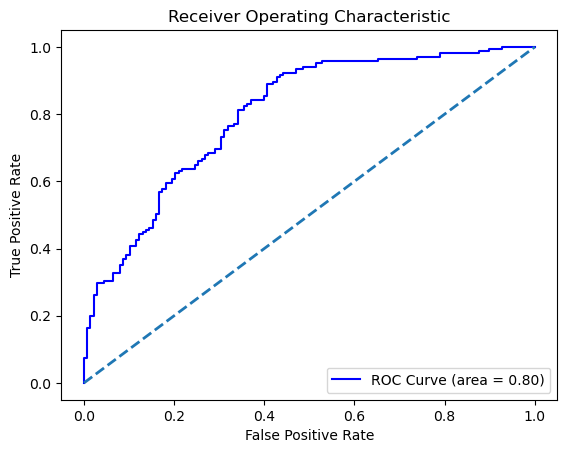

In [35]:
# plotting ROC Curve
plt.plot(fpr, tpr, color = 'blue', label = 'ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1], [0, 1], lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Prediction

 Calculate probability of an individual having heart disease who is 50 years old, has a resting blood pressure of 122,
 has exercise induced angina, and has maximum heart rate of 140?

In [36]:
test_data = pd.DataFrame({
    'age': [50],
    'trestbps': [122],
    'exang': [1],  # Exercise induced angina (1 = yes)
    'thalach': [140]
})

print('the probability of an individual having heart disease who is 50 years old, has a resting blood pressure of 122, has exercise induced angina, and has maximum heart rate of 140')
round(result.predict(test_data), 4)

the probability of an individual having heart disease who is 50 years old, has a resting blood pressure of 122, has exercise induced angina, and has maximum heart rate of 140


0    0.2716
dtype: float64

Calculate the probability of an individual having heart disease who is 50 years old, has a resting blood pressure of 130, does not have an exercise induced angina, and has maximum heart rate of 165? 

In [37]:
test_data2 = pd.DataFrame({'age': [50],
    'trestbps': [130],
    'exang': [0],  # Exercise induced angina (1 = yes)
    'thalach': [165]})

print('The probability of an individual having heart disease who is 50 years old, has a resting blood pressure of 130, does not have an exercise induced angina, and has maximum heart rate of 165')
round(result.predict(test_data2), 4)

The probability of an individual having heart disease who is 50 years old, has a resting blood pressure of 130, does not have an exercise induced angina, and has maximum heart rate of 165


0    0.7853
dtype: float64

##  Second Logistic Regression Model
You have been asked to create a logistic regression model for heart disease (target) using the variables age of the individual (age), resting blood pressure (trestbps), type of chest pain (cp) and maximum heart rate achieved (thalach). You also have to include the quadratic term for age and the interaction term between age and maximum heart rate achieved.

In [38]:
model2 = smf.logit(formula = 'target ~ age + trestbps + cp + thalach + I(age ^2) + age:thalach', data = heart_data)
res2 = model2.fit()
pred2 = res2.predict()
print(res2.summary())

Optimization terminated successfully.
         Current function value: 0.501332
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Wed, 07 Jan 2026   Pseudo R-squ.:                  0.2726
Time:                        17:47:39   Log-Likelihood:                -151.90
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 3.211e-22
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -21.0912      7.432     -2.838      0.005     -35.657      -6.525
age             0.3396    

### Confusion Matrix
|           | Predicted 0 |		Predicted 1
------------|-------------|-----------------
| Actual 0:	| True Negatives (TN)  | False Positives (FP)
| Actual 1:	| False Negatives (FN) | True Positives (TP)# Confusion Matrix

In [39]:
# computing confusion matrix
conf_mat_m2 = res2.pred_table()
conf_m2_table = pd.DataFrame(conf_mat_m2, columns = col_name, index = row_name)

# printing confusion matrix
(conf_m2_table)

,Predicted: 0,Predicted: 1
Actual: 0,97.0,41.0
Actual: 1,35.0,130.0


### ROC Curve

In [40]:
# computing ROC
fpr, tpr, thresholds = roc_curve(categorical_heart['target'], pred2)

roc_auc = auc(fpr, tpr)


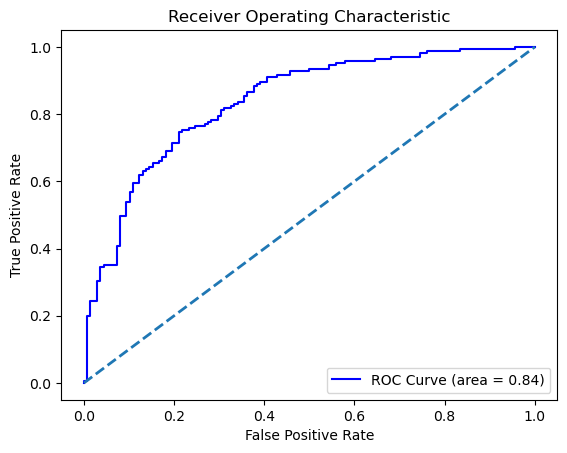

In [41]:
# plotting ROC Curve
plt.plot(fpr, tpr, color = 'blue', label = 'ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1], [0, 1], lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Prediction

the probability of an individual having heart disease who is 50 years old, has a resting blood pressure of 115, does not experience chest pain, and has maximum heart rate of 133?

In [42]:
test_data3 = pd.DataFrame({'age': [50],
    'trestbps': [115],
    'cp' : [0],
    'thalach': [133]})

print('The probability of an individual having heart disease who is 50 years old, has a resting blood pressure of 115, does not experience chest pain, and has maximum heart rate of 133')
round(res2.predict(test_data3), 4)

The probability of an individual having heart disease who is 50 years old, has a resting blood pressure of 115, does not experience chest pain, and has maximum heart rate of 133


0    0.2582
dtype: float64

the probability of an individual having heart disease who is 50 years old, has a resting blood pressure of 125, experiences chest pain, and has maximum heart rate of 155?

In [43]:
test_data4 = pd.DataFrame({'age': [50],
    'trestbps': [125],
    'cp' : [1],
    'thalach': [155]})

print('The probability of an individual having heart disease who is 50 years old, has a resting blood pressure of 125, experiences chest pain, and has maximum heart rate of 155')
round(res2.predict(test_data4), 4)

The probability of an individual having heart disease who is 50 years old, has a resting blood pressure of 125, experiences chest pain, and has maximum heart rate of 155


0    0.6585
dtype: float64

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
X = heart_data[['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'exang', 'ca']]
y = heart_data['target']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
rfc = RandomForestClassifier(n_estimators = 150, random_state = 42)
rfc_model = rfc.fit(X_train, y_train)
rfc_model

RandomForestClassifier(n_estimators=150, random_state=42)

In [48]:
rfc_pred = rfc_model.predict(X_test)
rfc_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [49]:
rfc_cr = classification_report(y_test, rfc_pred)
print(rfc_cr)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.87      0.89      0.88        37

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [51]:
rfc_cm = confusion_matrix(y_test, rfc_pred, labels = rfc_model.classes_)
rfc_cm

array([[19,  5],
       [ 4, 33]], dtype=int64)

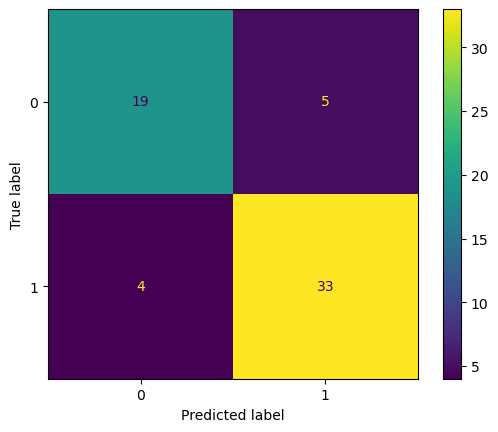

In [52]:
rfc_cmd = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=rfc_model.classes_)
rfc_cmd.plot()

In [53]:
errors = []

for n in range(1, 150):
    rfc = RandomForestClassifier(n_estimators = n)
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, pred)

    errors.append(err)

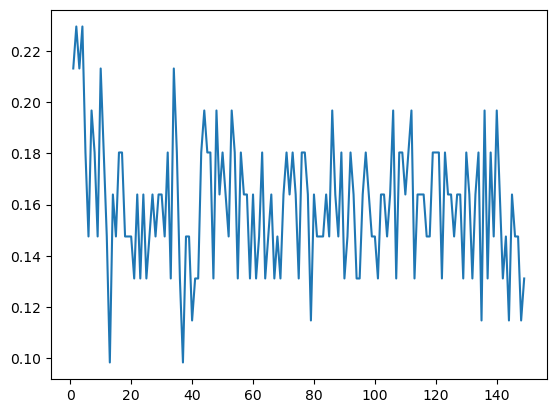

In [54]:
plt.plot(range(1, 150), errors)

In [55]:
# Running Random Forest Model with 30 trees
rfc = RandomForestClassifier(n_estimators = 30, random_state = 42)
rfc_model = rfc.fit(X_train, y_train)
rfc_model

RandomForestClassifier(n_estimators=30, random_state=42)

In [56]:
rfc_pred = rfc_model.predict(X_test)

rfc_cr = classification_report(y_test, rfc_pred)
print(rfc_cr)

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.87      0.92      0.89        37

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



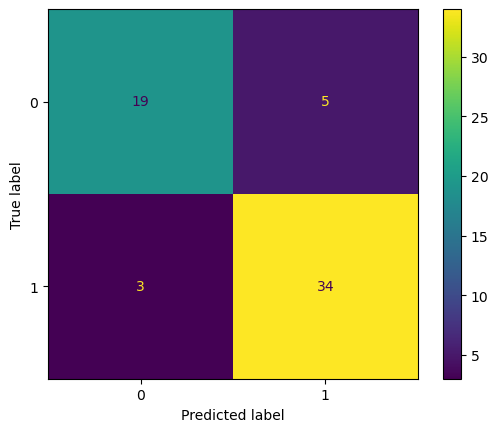

In [57]:
# Confusion Matrix
rfc_cm = confusion_matrix(y_test, rfc_pred, labels = rfc_model.classes_)
rfc_cmd = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=rfc_model.classes_)
rfc_cmd.plot()